In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/USX28939/iCloudDrive/Interview Modelling Data/cruise_ship_info.csv")

(158, 9)
     Ship_name Cruise_line  Age  Tonnage  passengers  length  cabins  \
0      Journey     Azamara    6   30.277        6.94    5.94    3.55   
1        Quest     Azamara    6   30.277        6.94    5.94    3.55   
2  Celebration    Carnival   26   47.262       14.86    7.22    7.43   
3     Conquest    Carnival   11  110.000       29.74    9.53   14.88   
4      Destiny    Carnival   17  101.353       26.42    8.92   13.21   

   passenger_density   crew  
0              42.64   3.55  
1              42.64   3.55  
2              31.80   6.70  
3              36.99  19.10  
4              38.36  10.00  
Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object
              Age     Tonnage  passengers      length      cabins  \
count  158.000000  158.000000  158

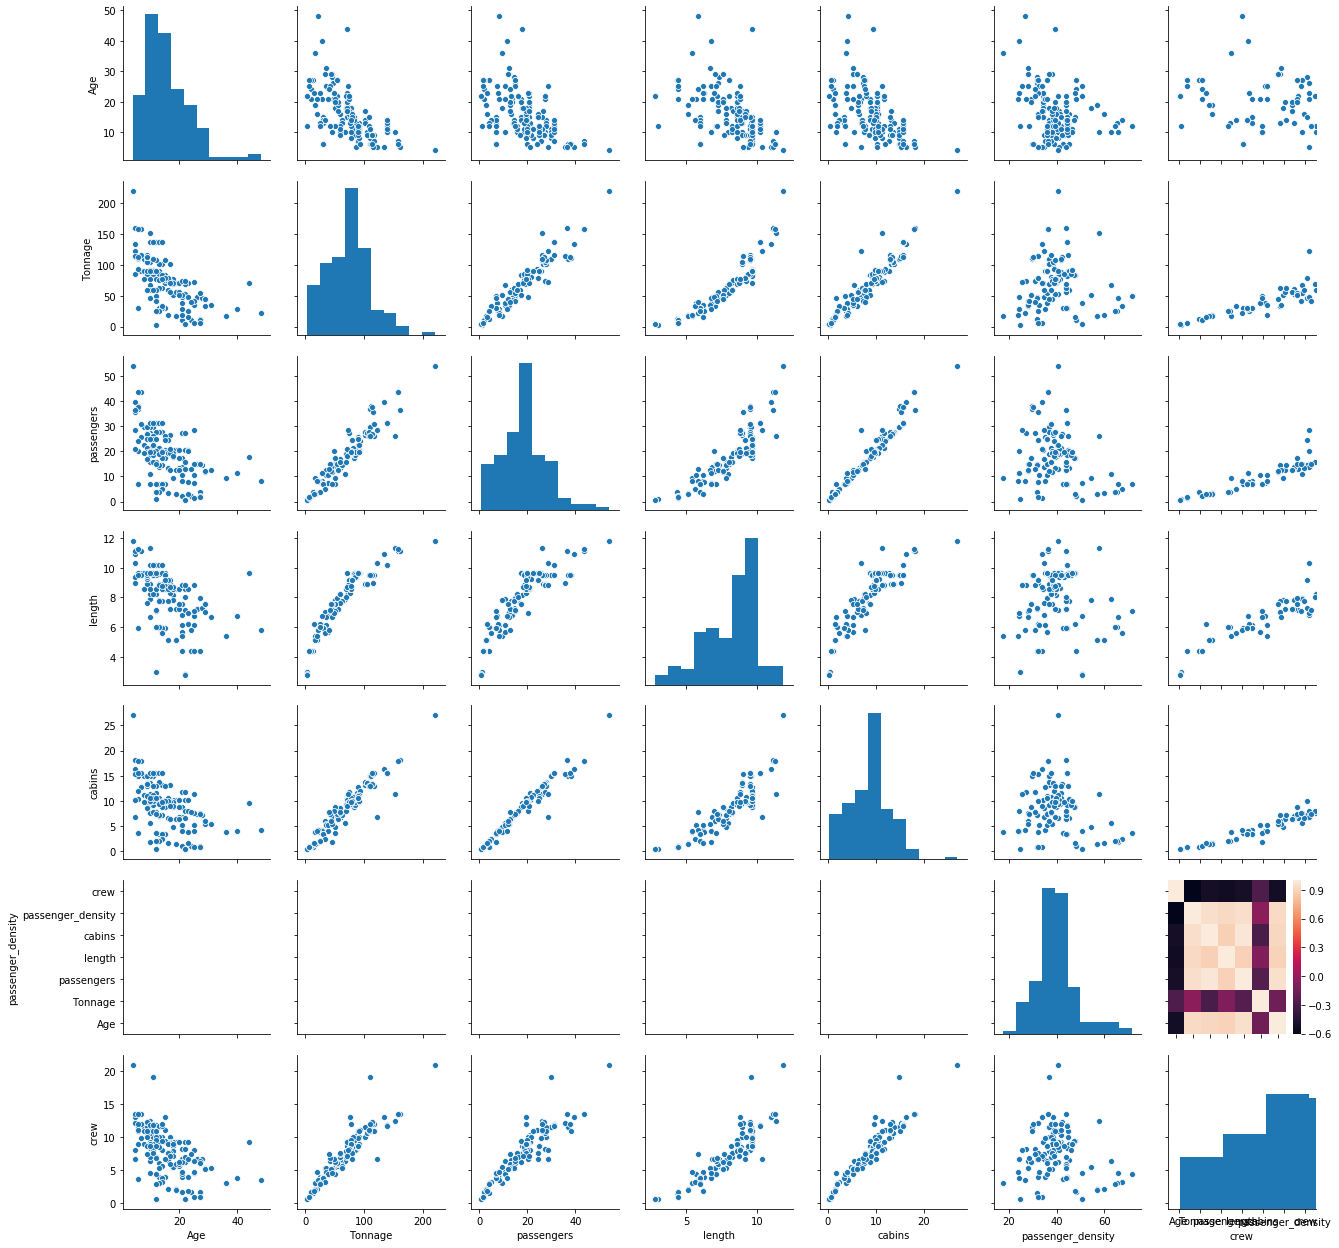

In [24]:
print(data.shape)
print(data.head())
print(data.dtypes)
print(data.describe())
print(data.duplicated())
print(data.isnull().sum())
print(data.nunique())
print(sns.pairplot(data))
print(sns.heatmap(data.corr()))

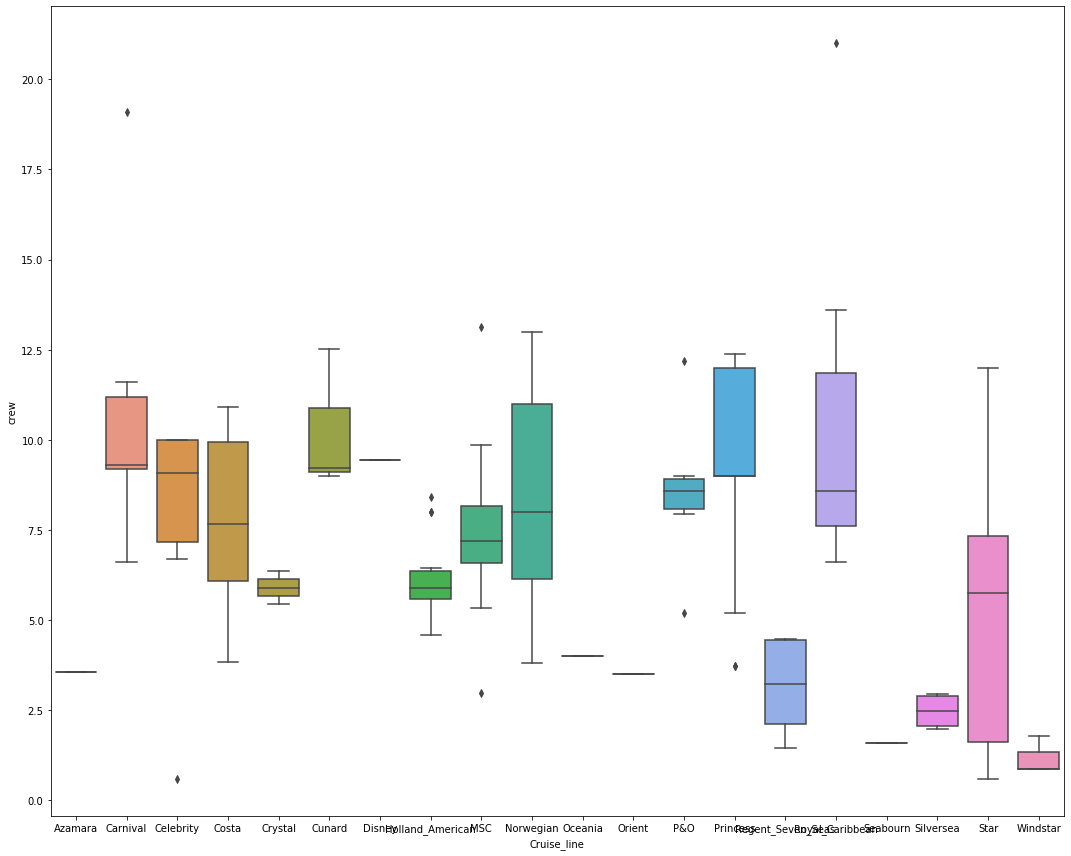

In [31]:
plt.figure(figsize=(15,12))
sns.boxplot(data["Cruise_line"],data["crew"])
plt.tight_layout()

In [3]:
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
t = data.duplicated()
print(type(t))
t.head()

<class 'pandas.core.series.Series'>


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
data.loc[0,["Age"]] = np.nan

In [95]:
data["Age"].rank()

0       10.5
1       10.5
2      144.0
3       47.5
4      101.0
       ...  
153    129.5
154     79.0
155    141.0
156    147.0
157    134.5
Name: Age, Length: 158, dtype: float64

In [4]:
data.shape

(158, 9)

In [5]:
data.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [6]:
data["Ship_name"].nunique(),data["Cruise_line"].nunique()

(138, 20)

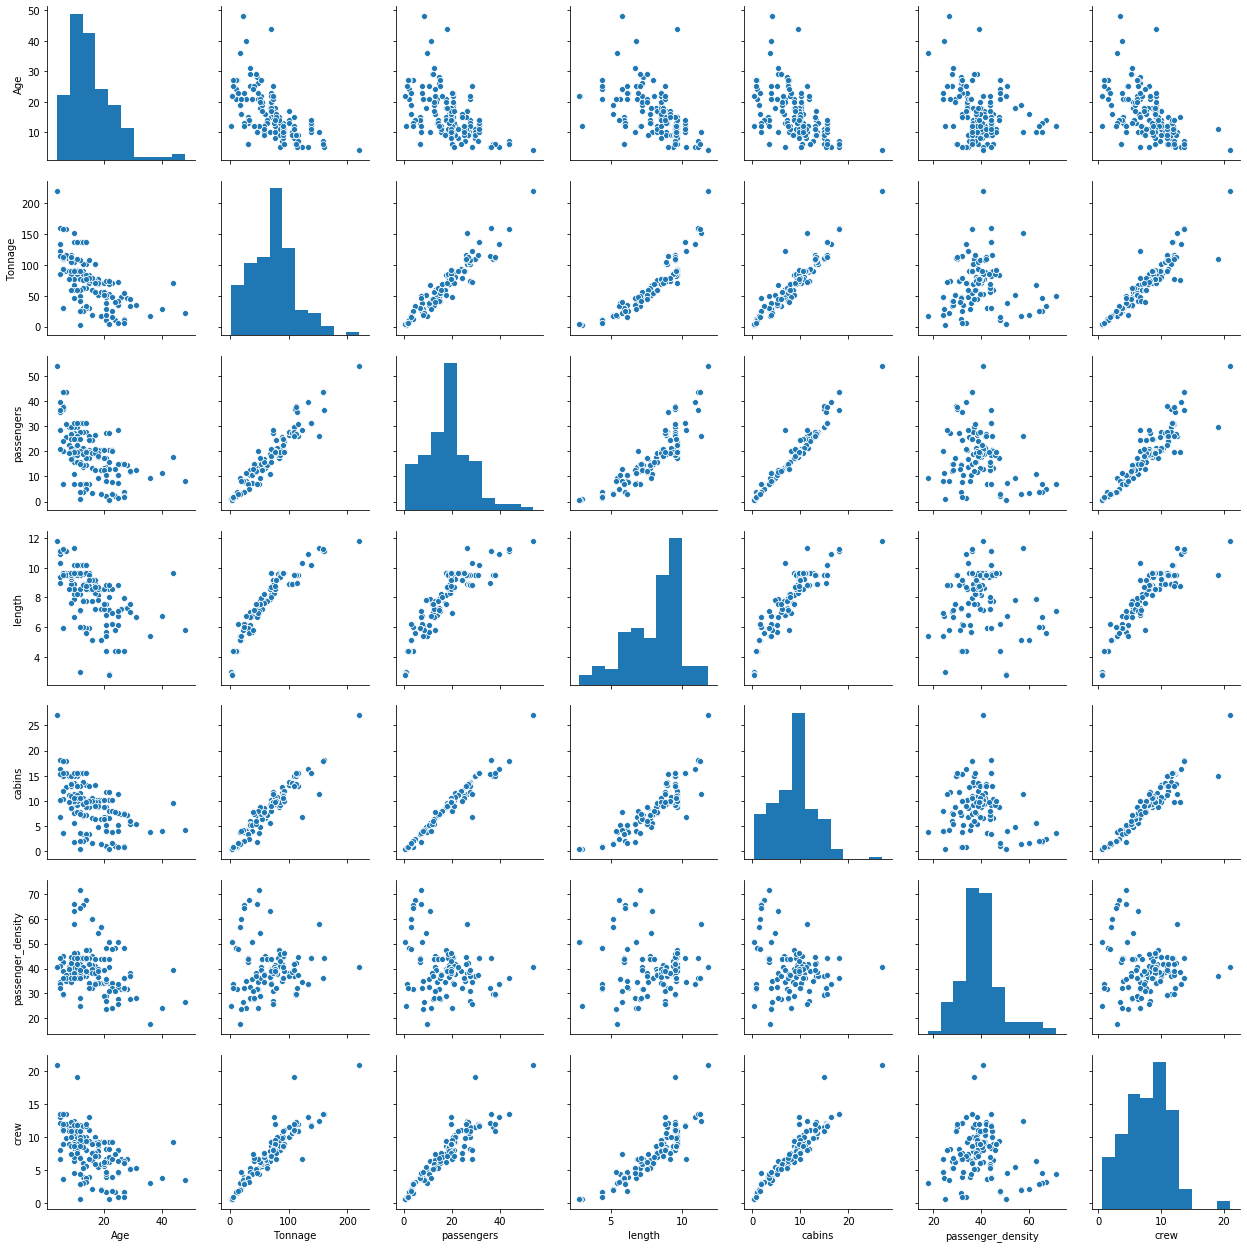

In [7]:
sns.pairplot(data)

In [ ]:
data.groupby("Ship_name").count()

In [ ]:
data.groupby("Cruise_line").count()

In [11]:
data.drop(["Ship_name"], inplace=True, axis=1)

In [12]:
data = pd.get_dummies(data)
data.shape

(158, 27)

In [13]:
data.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.columns

Index(['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density',
       'crew', 'Cruise_line_Azamara', 'Cruise_line_Carnival',
       'Cruise_line_Celebrity', 'Cruise_line_Costa', 'Cruise_line_Crystal',
       'Cruise_line_Cunard', 'Cruise_line_Disney',
       'Cruise_line_Holland_American', 'Cruise_line_MSC',
       'Cruise_line_Norwegian', 'Cruise_line_Oceania', 'Cruise_line_Orient',
       'Cruise_line_P&O', 'Cruise_line_Princess',
       'Cruise_line_Regent_Seven_Seas', 'Cruise_line_Royal_Caribbean',
       'Cruise_line_Seabourn', 'Cruise_line_Silversea', 'Cruise_line_Star',
       'Cruise_line_Windstar'],
      dtype='object')

In [15]:
y = data["crew"].copy()
data.drop(["crew"], inplace=True, axis=1)

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate

In [17]:
train_x, test_x, train_y, test_y =train_test_split(data, y, test_size=.25, random_state = 10)
#train_test_split(data.loc[:,"Ship_name":"passenger_density"],data["crew"],test_size =.25 , random_state = 10)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((118, 26), (40, 26), (118,), (40,))

In [18]:
train_x.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,15.559322,71.205636,18.060678,8.120169,8.638644,40.583898,0.008475,0.144068,0.076271,0.059322,...,0.016949,0.008475,0.042373,0.118644,0.033898,0.161017,0.016949,0.033898,0.025424,0.025424
std,7.304772,38.525248,9.758347,1.813284,4.574907,8.830444,0.092057,0.352656,0.266563,0.237234,...,0.129631,0.092057,0.202297,0.324748,0.181739,0.369114,0.129631,0.181739,0.158080,0.158080
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,46.013000,11.570000,7.100000,5.350000,35.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,71.779500,19.500000,8.550000,9.515000,39.740000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.000000,90.772500,22.430000,9.517500,10.605000,44.260000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


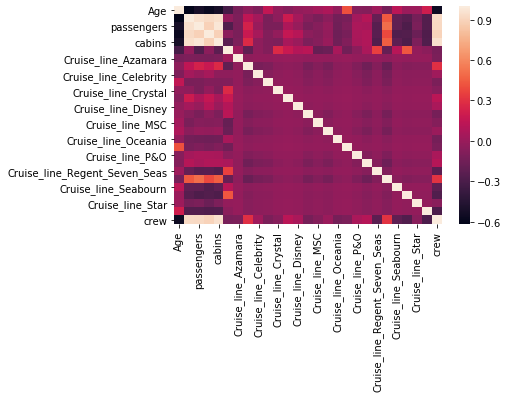

In [19]:
sns.heatmap(pd.concat([train_x,train_y], axis=1).corr())

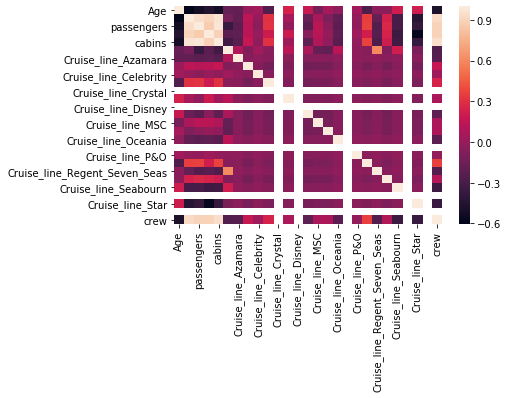

In [20]:
sns.heatmap(pd.concat([test_x,test_y], axis=1).corr())

# Building a muilt-regression model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
LR = LinearRegression(normalize=True)
all_accuracies = cross_val_score(estimator=LR, X=train_x, y=train_y, cv=5)

In [61]:
print("cross val accuracy for all CV are ", all_accuracies)
#<b> Cross val mean and Srd <\b>
print("cross val mean is  {} and cross val std is {}".format (all_accuracies.mean(), all_accuracies.std()))

cross val accuracy for all CV are  [0.93238973 0.86085452 0.95234784 0.95708745 0.93893475]
cross val mean is  0.9283228584475491 and cross val std is 0.034887620718431975


### Use Cross validate, as its used to pass multiple scoring metrics in comparison to cross_val_score which only allow one

In [66]:
scoring = {'neg_mean_abs_er': 'neg_mean_absolute_error',
           'neg_mean_sq_err': 'neg_mean_squared_error',
           'r2': 'r2',
          'explained_variance':'explained_variance'}
#scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
#                         cv=5, return_train_score=True)

In [67]:
cv1 =cross_validate(estimator=LR, X=train_x, y=train_y, cv=5, scoring= scoring,return_estimator = True)

In [68]:
cv1

{'fit_time': array([0.00797963, 0.00299239, 0.00498724, 0.00299311, 0.00299239]),
 'score_time': array([0.0059824 , 0.00598407, 0.0039885 , 0.00598478, 0.0059824 ]),
 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)),
 'test_neg_mean_abs_er': array([-0.55528577, -0.64701009, -0.49415712, -0.52933186, -0.52104584]),
 'test_neg_mean_sq_err': array([-0.89431089, -2.20288547, -0.46977867, -0.55613223, -0.61225171]),
 'test_r2': array([0.93238973, 0.86085452, 0.95234784, 0.95708745, 0.93893475]),
 'test_explained_variance': array([0.93654247, 0.87011147, 0.9525982 , 0.95997839, 0.94958999])}

# Prediction

In [42]:
LR = LinearRegression(normalize=True)
LR.fit(train_x,train_y)
train_y_pred = LR.predict(train_x)
test_y_pred = LR.predict(test_x)

# Residual Plot 

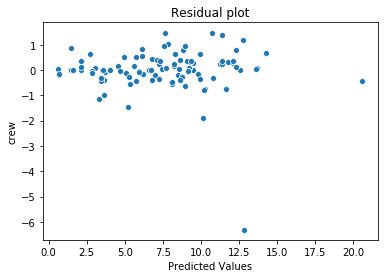

In [63]:
plt.xlabel("Predicted Values")
plt.ylabel("Residual Values")
plt.title("Residual plot")
sns.scatterplot(train_y_pred, train_y_pred-train_y)
sns.

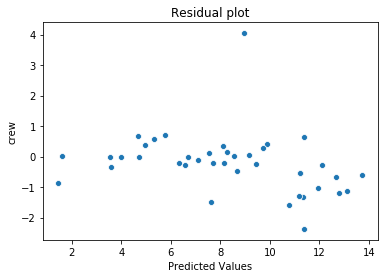

In [64]:
plt.xlabel("Predicted Values")
plt.ylabel("Residual Values")
plt.title("Residual plot")
sns.scatterplot(test_y_pred, test_y-test_y_pred)

# Evaluation of regression model


In [52]:
print("mean sq error for train is",mean_squared_error(train_y,train_y_pred))
print("mean sq error for test is",mean_squared_error(test_y,test_y_pred))

mean sq error for train is 0.6203367688902257
mean sq error for test is 0.9765914144203343


In [53]:
print("r^2 for train is",r2_score(train_y,train_y_pred))
print("r^2 for test is",r2_score(test_y,test_y_pred))

r^2 for train is 0.9527780780288927
r^2 for test is 0.8949040871930499


# Regression coefficients


In [48]:
LR.intercept_

-1.8667689512765442

In [49]:
LR.coef_

array([-1.53175563e-03, -3.31046535e-03, -5.45420507e-02,  4.00569527e-01,
        8.19533283e-01,  1.20641606e-02,  1.01570326e-01,  2.06559620e-01,
        7.32464060e-01, -2.07723709e-01,  4.66917060e-01,  1.81715038e+00,
        9.63037693e-01, -5.09901528e-01,  1.00404204e-02,  1.03013549e-01,
        6.45365552e-01, -1.56877694e-01, -3.76316681e-02,  5.02531974e-02,
        7.80220336e-01, -1.22285271e+00,  4.52920199e-01,  2.57628704e-01,
        1.40004717e+00, -5.19240161e-02])

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'bootstrap': [True, False]
}

In [34]:
RF = RandomForestRegressor()
gd_sr = GridSearchCV(estimator=RF,
                     param_grid=grid_param,
                     scoring='neg_mean_squared_error',
                     cv=5,
                     n_jobs=-1)

In [35]:
gd_sr.fit(train_x, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
     

In [36]:
best_result = gd_sr.best_score_
print(best_result)

-1.6040103376122699


In [37]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'n_estimators': 300}


In [38]:
gd_sr

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
     

In [40]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [90]:
from random import sample 
  
# Prints list of random items of given length 
list1 = [1, 2, 3, 4, 5,6,7,8,9,0,11]  
  
print(sample(list1,3)) 

[7, 5, 2]


# Logistic Regression

In [70]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [73]:
data= pd.read_csv("C:\\Users\\USX28939\\iCloudDrive\\Interview Modelling Data\\Classification\\banking.csv")

In [76]:
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [77]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [78]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [79]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [81]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Data exploration

In [82]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

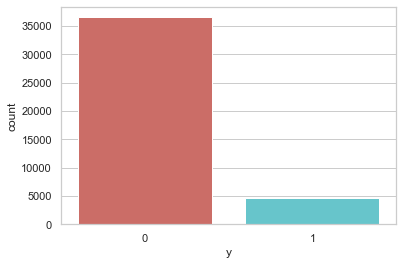

In [83]:
sns.countplot(x='y',data=data, palette='hls')

In [84]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [86]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Text(0, 0.5, 'Frequency of Purchase')

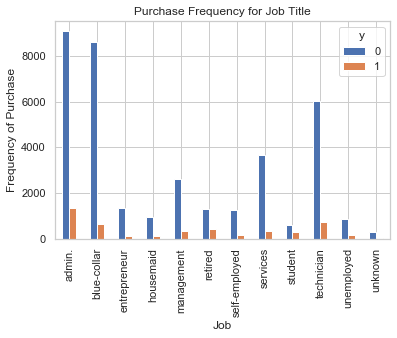

In [88]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [107]:
import numpy as np
list((np.random.randint(10, size =(2,3))).flatten())

[8, 5, 2, 3, 6, 9]

In [97]:
d={"A":[1,2,3], "B":[4,5,6]}
a =pd.DataFrame(d)
a

,A,B
0,1,4
1,2,5
2,3,6


In [116]:
a.corr()

,A,B
A,1.0,1.0
B,1.0,1.0
